## Bike Sharing problem using Linear Regression

In [291]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

### Step 1: Understanding the Data

In [292]:
#Importing dataset and inspecting various variables.
bike = pd.read_csv('day.csv')
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [293]:
# Dropping irrelevant/redundant columns 
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [294]:
bike.shape

(730, 12)

In [295]:
# Inspecting the variable datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [296]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [297]:
# Column wise null values
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Step 2: Visualising the Data

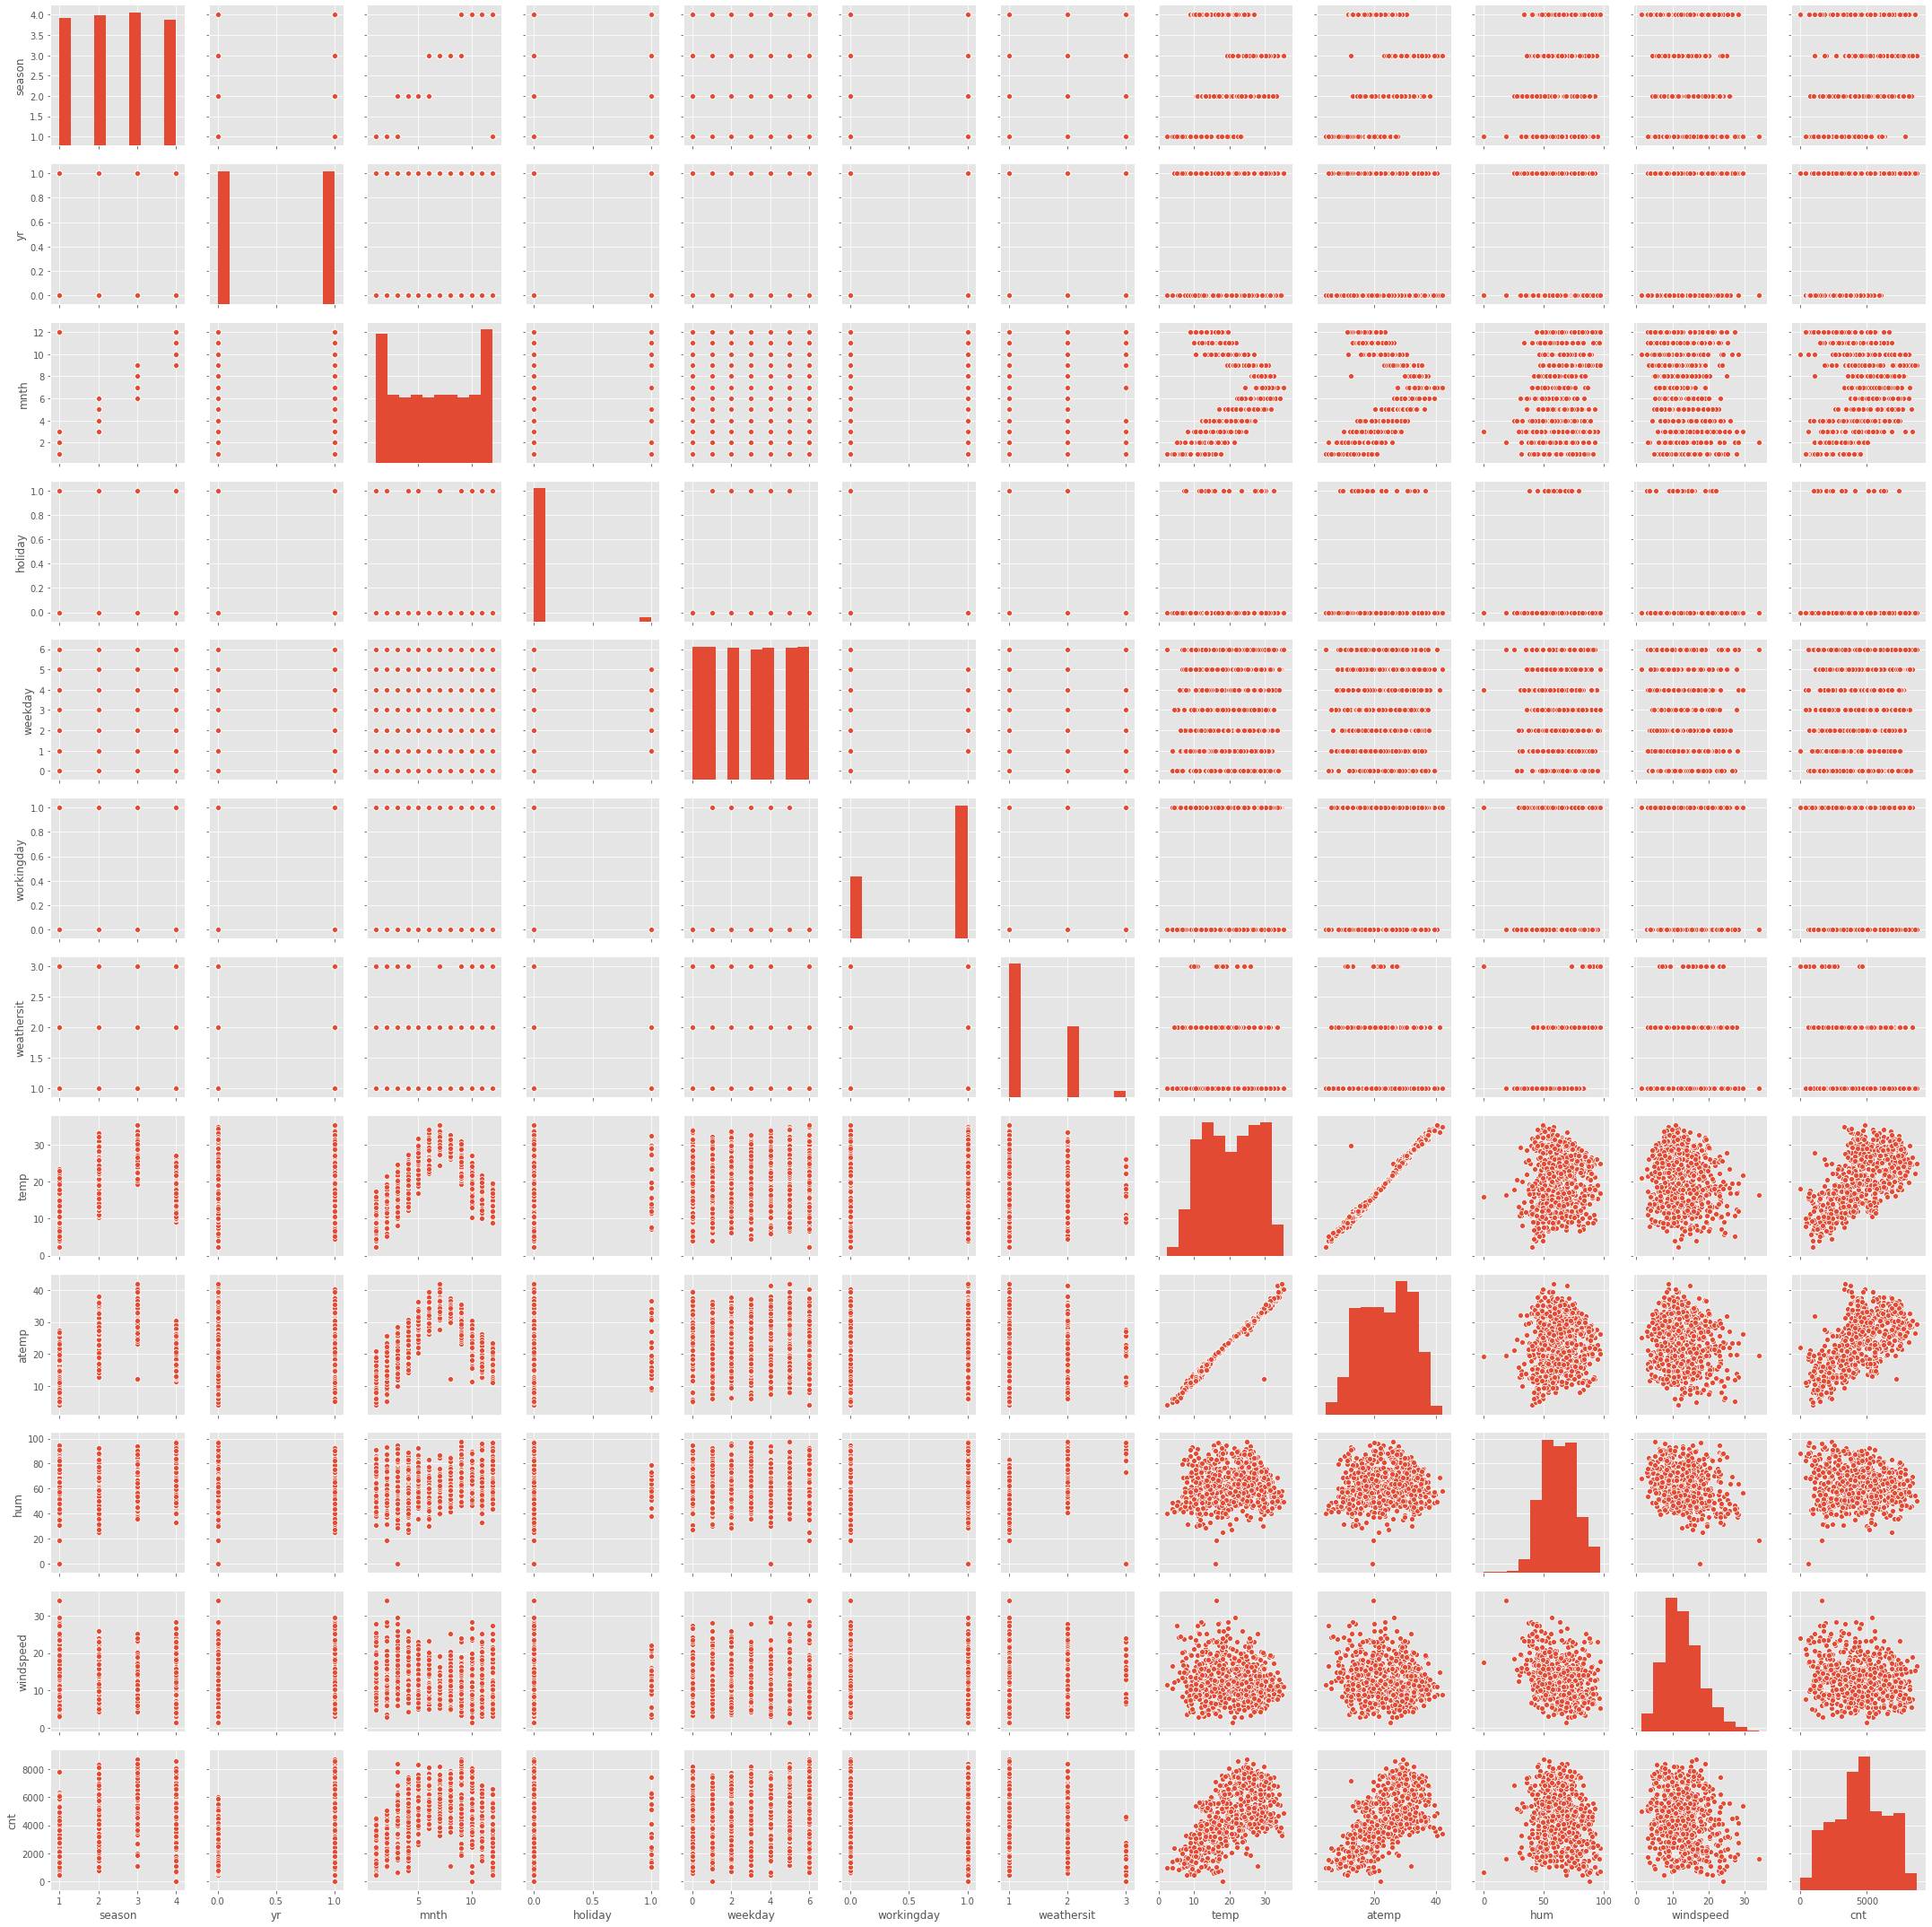

In [298]:
# Visualising numeric variables using pairplot
sns.pairplot(bike)
plt.show()

1)  Temperature variables temp, atemp have the most linear relationship with count

1)	Year 2019 has shown a significant growth in count. 

2)	Count is dependent on “weekday” as it is almost evenly distributed across the days of the week.

3)	Weather_1 mostly affects the dependent variable count.

4)	Count is not affected by holidays.

5)	Count seems to be consistent across the seasons.

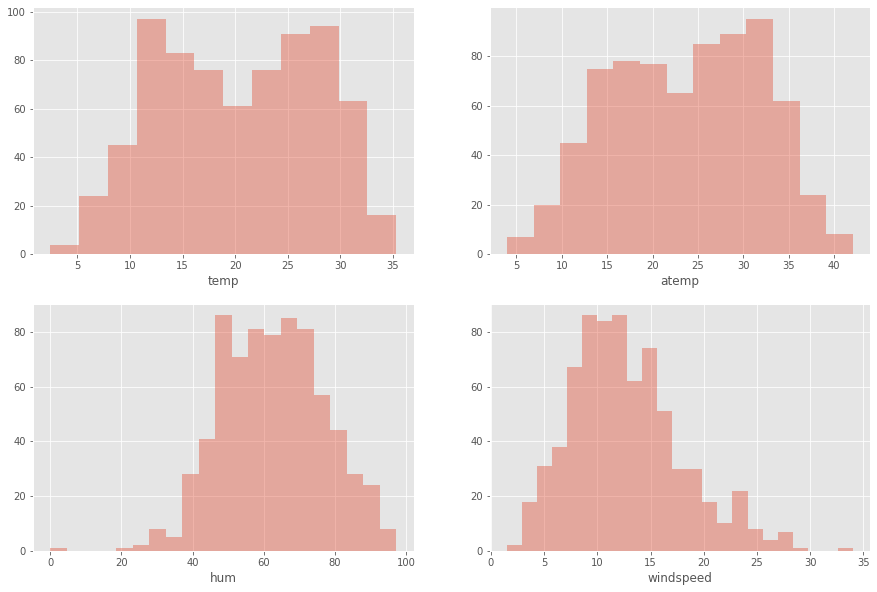

In [299]:
# Plotting a few continuous variables using distplot
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.distplot(bike.temp, kde=False);
plt.subplot(2, 2, 2)
sns.distplot(bike.atemp, kde=False);
plt.subplot(2, 2, 3)
sns.distplot(bike.hum, kde=False);
plt.subplot(2, 2, 4)
sns.distplot(bike.windspeed, kde=False);

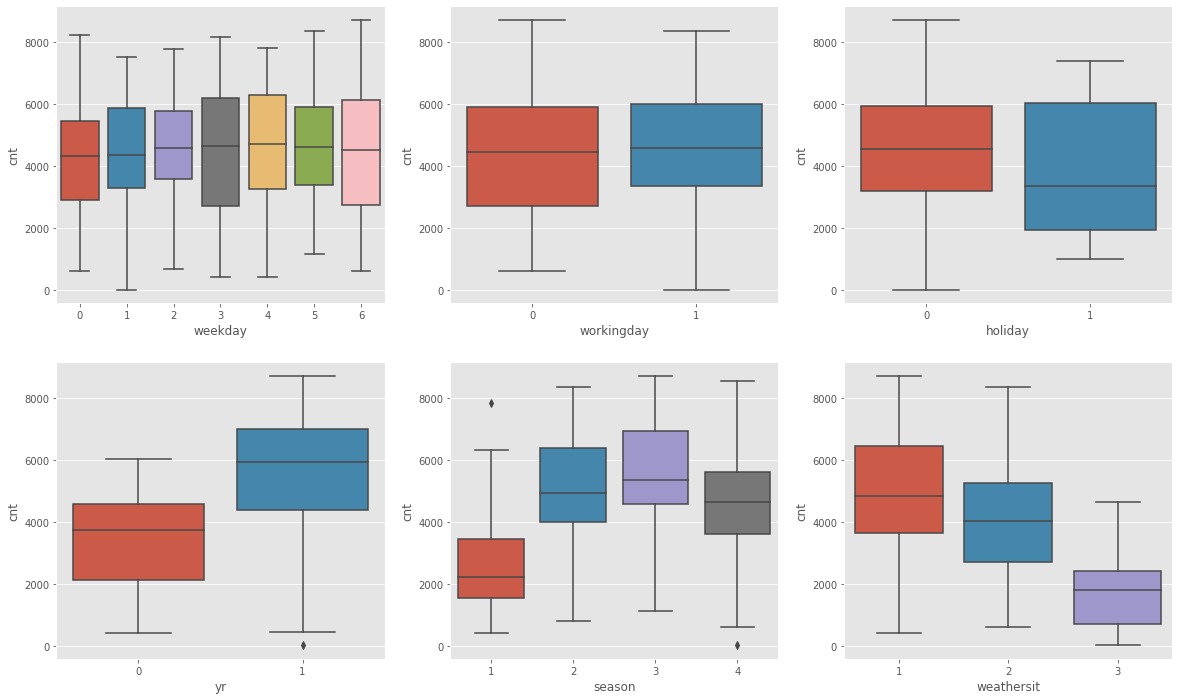

In [300]:
# Looking at some categorical variables for outliers
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

The categorical variables looks fine as far as outliers are concerned.

In [301]:
# Looking at some numeric variables with high colinearity with the dependent variable
bike.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [302]:
bike.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

The most colinear variables looks good with no outliers.

[Text(0, 0.5, 'cnt'), Text(0.5, 0, 'Holiday')]

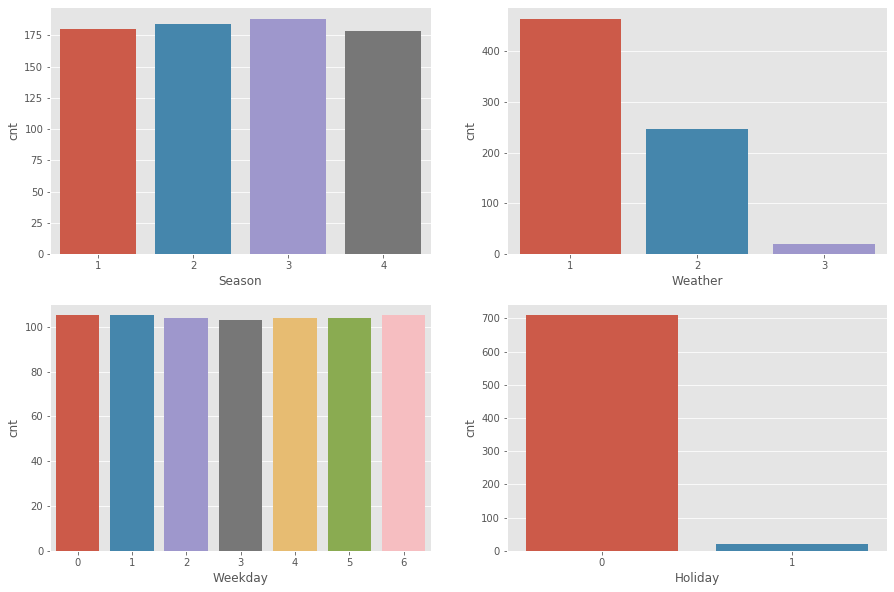

In [303]:
# Count plot of categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x=bike.season).set(xlabel='Season', ylabel = 'cnt')
plt.subplot(2, 2, 2)
sns.countplot(x=bike.weathersit).set(xlabel='Weather', ylabel = 'cnt')
plt.subplot(2, 2, 3)
sns.countplot(x=bike.weekday).set(xlabel='Weekday', ylabel = 'cnt')
plt.subplot(2, 2, 4)
sns.countplot(x=bike.holiday).set(xlabel='Holiday', ylabel = 'cnt')

The dataset looks free of outliers and now we can proceed with the preparation of data.

### Step 3: Data Preparation

Dummy Variables

In [304]:
# Get the dummy variables for the feature 'weathersit'
weathers=pd.get_dummies(bike['weathersit'])

In [305]:
weathers.head(10)

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,1,0
7,0,1,0
8,1,0,0
9,1,0,0


In [306]:
# Drop the first column from wathers using 'drop_first = True'
weathers=pd.get_dummies(bike['weathersit'],prefix='weather', drop_first = True)

In [307]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weathers], axis = 1)

In [308]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weather_2,weather_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [309]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [310]:
# Get the dummy variables for the feature 'season'
seasons=pd.get_dummies(bike['season'])

In [311]:
seasons.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [312]:
# Drop the first column from wathers using 'drop_first = True'
seasons=pd.get_dummies(bike['season'], prefix='season',drop_first = True)

In [313]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, seasons], axis = 1)

In [314]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weather_2,weather_3,season_2,season_3,season_4
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [315]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

### Step 4: Splitting the data
**The first basic step for regression is performing a train-test split.**

In [316]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

**Rescaling using MinMax technique**

In [317]:
from sklearn.preprocessing import MinMaxScaler

In [318]:
scaler = MinMaxScaler()

In [319]:
# Apply scaler() to all the columns except the 'dummy' variables
numvar = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_train[numvar] = scaler.fit_transform(bike_train[numvar])

In [320]:
bike_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weather_2,weather_3,season_2,season_3,season_4
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0


In [321]:
bike_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weather_2,weather_3,season_2,season_3,season_4
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,0.245098,0.262745,0.24902
std,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,0.430568,0.440557,0.43287
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


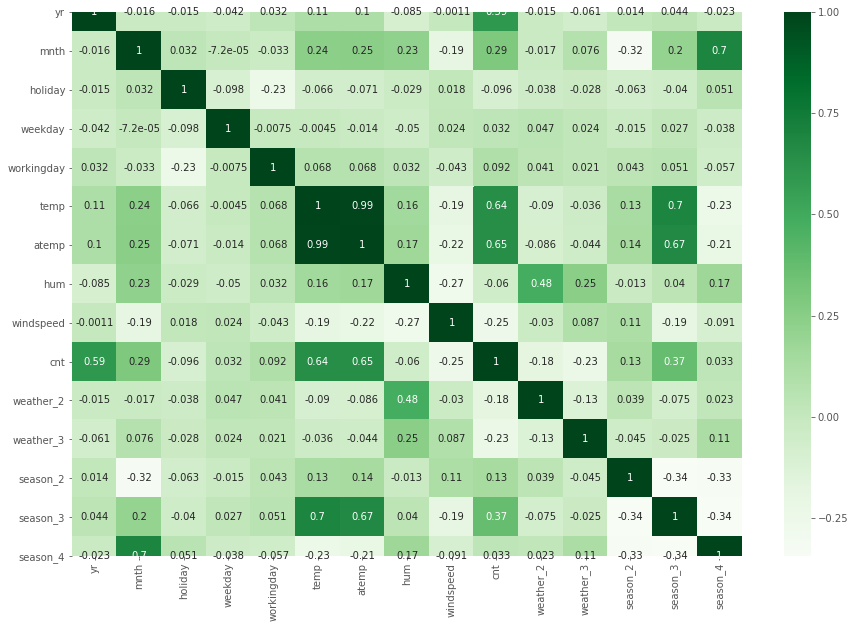

In [322]:
# Let's check the correlation coefficients of each variable.
plt.figure(figsize=(15,10))
sns.heatmap(bike_train.corr(), cmap="Greens", annot=True)

 'temp','atemp' are the ones that are most correlated with the count.

 'atemp' is highly correlated to 'temp'
 
 'yr' is also highly correlated to the target variable.
 
 'windspeed' is negatively correlated to the count.

[Text(0, 0.5, 'cnt'), Text(0.5, 0, 'Year')]

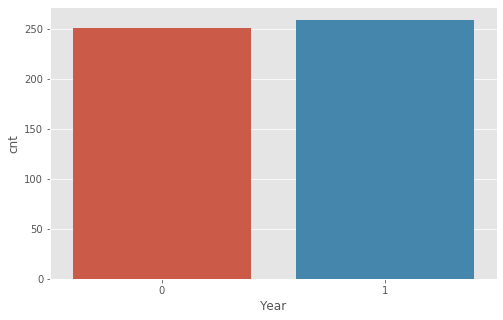

In [323]:
# Let's look at the categorical variable 'yr' which has a high correlation coefficient.
plt.figure(figsize=(8,5))
sns.countplot(x=bike_train.yr).set(xlabel='Year', ylabel = 'cnt')

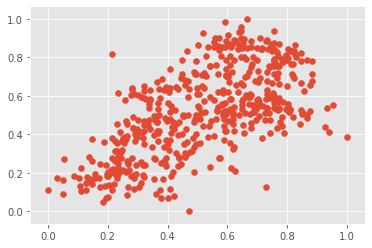

In [324]:
# Let's look at the continuous variable 'atemp' which has a high correlation coefficient.
plt.scatter(x="atemp",y="cnt",data=bike_train)

The above plot shows a linear relationship between the variable 'atemp' and the target variable 'cnt'

Dividing into X and Y sets for model building

In [325]:
y_train = bike_train.pop('cnt')
x_train = bike_train

### Step 5: Building a linear model

In [326]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [327]:
# Running RFE with the output number of the variable equal to 14
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 14)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [328]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weather_2', True, 1),
 ('weather_3', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1)]

In [329]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'weather_2', 'weather_3', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [330]:
# Creating x_train_rfe dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [331]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [332]:
# Running the linear model
lm = sm.OLS(y_train,x_train_rfe).fit()   

In [333]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.69e-182
Time:                        23:46:35   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1688      0.030      5.642      0.0

**Checking VIF**

In [334]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,57.99
7,atemp,53.56
0,const,52.94
13,season_3,6.09
14,season_4,5.41
2,mnth,3.91
12,season_2,2.66
8,hum,1.91
10,weather_2,1.58
11,weather_3,1.26


Looking at the VIF value of the features and it's corresponding p value we chose to drop 'atemp'as it's VIF value is very high(also p value is 0.67).

In [335]:
x_train_new = x_train_rfe.drop(["atemp"], axis = 1)

In [336]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)

In [337]:
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()   

In [338]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.31e-183
Time:                        23:46:35   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1697      0.030      5.689      0.0

In [339]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.69
12,season_3,6.02
13,season_4,5.41
2,mnth,3.91
6,temp,3.51
11,season_2,2.66
7,hum,1.90
9,weather_2,1.58
10,weather_3,1.25
8,windspeed,1.20


Looking at the VIF value of the features and it's corresponding p value we chose to drop 'mnth'as it's VIF value is quite high(also p value is 0.624).

In [340]:
x_train_new = x_train_new.drop(["mnth"], axis = 1)

In [341]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)

In [342]:
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()   

In [343]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.00e-184
Time:                        23:46:35   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1717      0.030      5.818      0.0

In [344]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.67
11,season_3,4.78
5,temp,3.50
10,season_2,2.54
6,hum,1.89
12,season_4,1.87
8,weather_2,1.58
9,weather_3,1.25
7,windspeed,1.20
2,holiday,1.08


Now let's drop season_3 with VIF= 4.78 and check it's affect on the R2 values.

In [345]:
x_train_new = x_train_new.drop(["season_3"], axis = 1)

In [346]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)

In [347]:
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()   

In [348]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.40e-183
Time:                        23:46:35   Log-Likelihood:                 489.09
No. Observations:                 510   AIC:                            -954.2
Df Residuals:                     498   BIC:                            -903.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.030      5.597      0.0

In [349]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.58
6,hum,1.87
8,weather_2,1.56
11,season_4,1.25
9,weather_3,1.24
5,temp,1.23
7,windspeed,1.18
10,season_2,1.15
2,holiday,1.08
4,workingday,1.07


We see that all the VIF values are in the required range after dropping season_3 without compromising R2 values.

Now, weekday is correlated to the target variable, so let's drop holiday as it's the opposite of weekday/workingday and is negatively correlated to count.

In [350]:
x_train_new = x_train_new.drop(["holiday"], axis = 1)

In [351]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)

In [352]:
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()   

In [353]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.84e-183
Time:                        23:46:35   Log-Likelihood:                 486.15
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1591      0.030      5.339      0.0

In [354]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.95
5,hum,1.87
7,weather_2,1.56
10,season_4,1.25
8,weather_3,1.24
4,temp,1.23
6,windspeed,1.18
9,season_2,1.14
1,yr,1.03
2,weekday,1.02


Also let's drop one of the variables from weeday/workingday as they are similar.

In [355]:
x_train_new = x_train_new.drop(["workingday"], axis = 1)

In [356]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)

In [357]:
 # Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()  

In [358]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          9.67e-183
Time:                        23:46:36   Log-Likelihood:                 482.55
No. Observations:                 510   AIC:                            -945.1
Df Residuals:                     500   BIC:                            -902.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1753      0.029      5.974      0.0

In [359]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.82
4,hum,1.87
6,weather_2,1.56
9,season_4,1.25
7,weather_3,1.24
3,temp,1.22
5,windspeed,1.18
8,season_2,1.14
1,yr,1.03
2,weekday,1.02


### Step 6: Residual Analysis of the train data
Let's check if the error terms are normally distributed, which is one of the major assumptions of linear regression.

In [360]:
y_train_cnt = lm.predict(x_train_lm)

[Text(0.5, 0, 'Errors')]

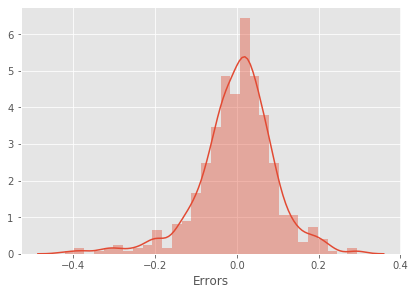

In [361]:
# Plot the histogram of the error terms
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.distplot(y_train - y_train_cnt).set(xlabel='Errors')

### Step 7: Making predictions
We have fitted the model and checked the normality of error terms.
Now let's make the predictions.

**Scaling**

In [362]:
numvar = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[numvar] = scaler.transform(bike_test[numvar])

**Dividing into x_test and y_test**

In [363]:
y_test = bike_test.pop('cnt')
x_test = bike_test

In [364]:
# Adding constant variable to test dataframe
x_test_new = sm.add_constant(x_test)

# Creating x_test_new dataframe by dropping variables from x_test_new
x_test_new = x_test_new.drop(["season_3","atemp","mnth","workingday","holiday"], axis = 1)

In [365]:
# Making predictions
y_pred = lm.predict(x_test_new)

### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

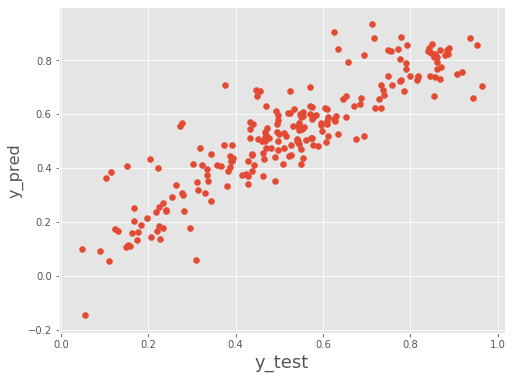

In [366]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [367]:
# Calculate the R-squared score on the test set.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7925993095696591

### Conclusion

**The factors affecting the demand for the shared bikes ie. the significant variables which predicts the demand are:**
1. Temperature(temp): With a good increase in temperature the count seems to increase. Cold and hot climates are not suitable for riding a bike.
2. The bike sales for the year 2019 has seen an increase compared to that of 2018. This trend is positive and seems to grow as the popularity of the brand increases.
3. Humidity(hum): A low humid weather is preferred when it comes to riding a bike.
4. Weekday/Workingday: People tend to ride their bikes on these days(perhaps use their holidays to relax).
5. Spring/Summer season: These are perhaps the two best seasons to ride bikes. So, season sales could definitely affect the market.
6. Windspeed: Low windspeed is usually the right time to ride a bike. So, any cyclone or torrential rains could affect the market.   
